In [2]:
import sqlite3 as sq
sq.sqlite_version

'3.8.11'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#Makes a connection to the US baby name database and setting the cursor.
conn=sq.connect('database.sqlite') #importing sql database
cur=conn.cursor() #defining the python cursor
#database contains column names of id, name, year, gender, count

In [5]:
cur.execute("SELECT * FROM NationalNames LIMIT 5;")
cur.fetchall()

[(1, 'Mary', 1880, 'F', 7065),
 (2, 'Anna', 1880, 'F', 2604),
 (3, 'Emma', 1880, 'F', 2003),
 (4, 'Elizabeth', 1880, 'F', 1939),
 (5, 'Minnie', 1880, 'F', 1746)]

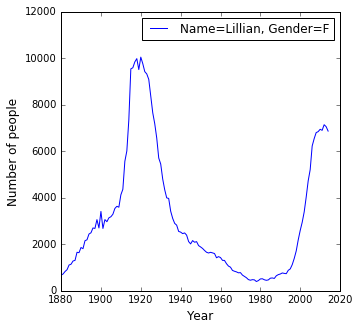

In [6]:
#Plot the number of females who were named Lillian for the full span of time for the database.
cur.execute("SELECT year, count FROM NationalNames WHERE name='Lillian' AND gender='F';")
data=cur.fetchall()
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
fig=plt.figure(figsize=(5,5))
plt.plot(x_val,y_val, label="Name=Lillian, Gender=F") 
plt.legend(fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of people', fontsize=12)
plt.show()

In [7]:
#Find the first 20 names from the year 2014 where 10 or less people have that name.
cur.execute("SELECT name FROM NationalNames WHERE year='2014' AND count<=10;")
#cur.fetchall()

In [8]:
#Find the first 20 distinct names that start with 'L'.
cur.execute("SELECT DISTINCT name FROM NationalNames WHERE name LIKE 'L%';")
#cur.fetchall()

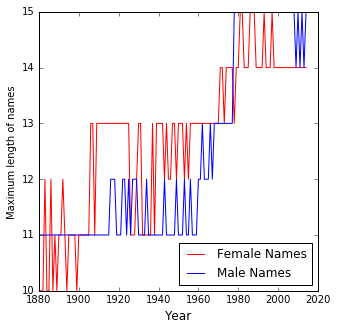

In [9]:
#Find the maximum length of male and female names per year and the plot.
cur.execute("SELECT year, MAX(LENGTH(name)) FROM NationalNames WHERE gender='F' GROUP BY year;") #max length of female name by year
longF=cur.fetchall()
cur.execute("SELECT year, MAX(LENGTH(name)) FROM NationalNames WHERE gender='M' GROUP BY year;") #max length of male name by year
longM=cur.fetchall()
xF = [x[0] for x in longF]
yF = [x[1] for x in longF]
xM = [x[0] for x in longM]
yM = [x[1] for x in longM]
fig=plt.figure(figsize=(5,5))
plt.plot(xF,yF, color="red", label="Female Names") #plot female name lengths in pink
plt.plot(xM,yM, color="blue", label="Male Names") #plot male name lengths in blue
plt.legend(loc='lower right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Maximum length of names')
plt.show()

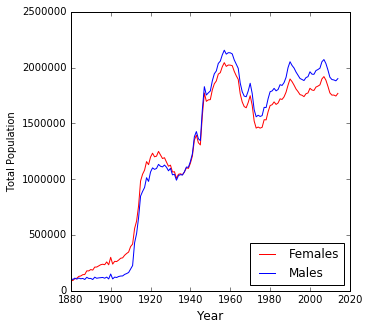

In [10]:
#Find the total number of males and females each year. Plot. Finding the total requires using the aggregated function, SUM, in the SQL SELECT statement.
cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='F' GROUP BY year") #total number of females by year
totalF=cur.fetchall()
cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='M' GROUP BY year") #total number of males by year
totalM=cur.fetchall()
xF = [x[0] for x in totalF]
yF = [x[1] for x in totalF]
fig=plt.figure(figsize=(5,5))
xM = [x[0] for x in totalM]
yM = [x[1] for x in totalM]
plt.plot(xF,yF, color="red", label="Females") #plot female name lengths in pink
plt.plot(xM,yM, color="blue", label="Males") #plot male name lengths in blue
plt.legend(loc='lower right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Population')
plt.show()

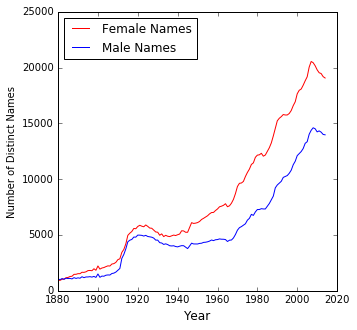

In [11]:
#Find the number of distinct male and female names per year. Plot. This requires the use of the DISTINCT function and the COUNT function (which returns the number of rows) in the SQL SELECT statement. 
cur.execute("SELECT year, COUNT(DISTINCT name) FROM NationalNames WHERE gender='F' GROUP BY year;") #number of distinct female names grouped by year
countF=cur.fetchall()
cur.execute("SELECT year, COUNT(DISTINCT name) FROM NationalNames WHERE gender='M' GROUP BY year;") #number of distinct female names grouped by year
countM=cur.fetchall()
xF = [x[0] for x in countF]
yF = [x[1] for x in countF]
fig=plt.figure(figsize=(5,5))
xM = [x[0] for x in countM]
yM = [x[1] for x in countM]
plt.plot(xF,yF, color="red", label="Female Names") #plot female in pink
plt.plot(xM,yM, color="blue", label="Male Names") #plot male in blue
plt.legend(loc='upper left',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Distinct Names')
plt.show()

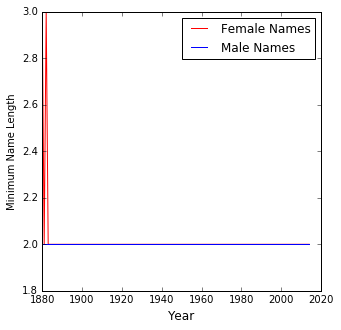

In [12]:
#Find the minimum length of female and male names each year (which turns out to be 2 each year for each gender except one year for the females the number is 3).  This requires the MIN and LENGTH functions for the SQL SELECT statement.
cur.execute("SELECT year, MIN(LENGTH(name)) FROM NationalNames WHERE gender='F' GROUP BY year;") #min length of female name by year
shortF=cur.fetchall()
cur.execute("SELECT year, MIN(LENGTH(name)) FROM NationalNames WHERE gender='M' GROUP BY year;") #min length of male name by year
shortM=cur.fetchall()
xF = [x[0] for x in shortF]
yF = [x[1] for x in shortF]
fig=plt.figure(figsize=(5,5))
xM = [x[0] for x in shortM]
yM = [x[1] for x in shortM]
plt.plot(xF,yF, color="red", label="Female Names") #plot female name lengths in pink
plt.plot(xM,yM, color="blue", label="Male Names") #plot male name lengths in blue
plt.legend(loc='upper right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Minimum Name Length')
plt.show()

In [113]:
#Find the minimum length of female and male names each year (which turns out to be 2 each year for each gender except one year for the females the number is 3).  This requires the MIN and LENGTH functions for the SQL SELECT statement.
cur.execute("SELECT DISTINCT name, MIN(LENGTH(name)) FROM NationalNames WHERE gender='M' GROUP BY year;")
cur.fetchall()

[('Ed', 2), ('Al', 2), ('Ty', 2)]

In [114]:
#Find the minimum length of female and male names each year (which turns out to be 2 each year for each gender except one year for the females the number is 3).  This requires the MIN and LENGTH functions for the SQL SELECT statement.
cur.execute("SELECT DISTINCT name, MIN(LENGTH(name)) FROM NationalNames WHERE gender='F' GROUP BY year;")
cur.fetchall()

[('Ida', 3), ('Jo', 2), ('Lu', 2), ('Pa', 2), ('Vy', 2), ('Bo', 2), ('An', 2)]

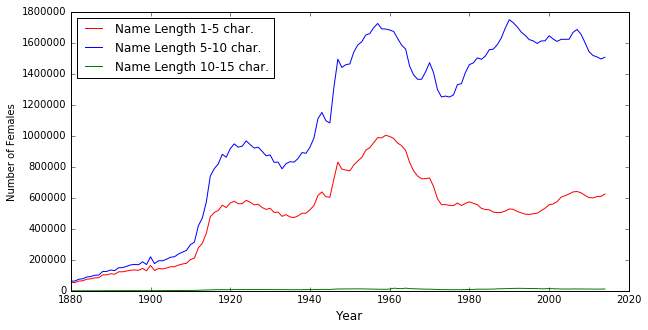

In [118]:
#Find and plot the number of females whose names are of length 1-5 characters, 5-10 characters, and 10-15 character. cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='F' AND LENGTH(name) BETWEEN 1 AND 5 GROUP BY year;")
one2five=cur.fetchall()
cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='F' AND LENGTH(name) BETWEEN 5 AND 10 GROUP BY year;")
five2ten=cur.fetchall()
cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='F' AND LENGTH(name) BETWEEN 10 AND 15 GROUP BY year;")
ten2fifteen=cur.fetchall()
xshort = [x[0] for x in one2five]
yshort = [x[1] for x in one2five]
xmid = [x[0] for x in five2ten]
ymid = [x[1] for x in five2ten]
xlong = [x[0] for x in ten2fifteen]
ylong = [x[1] for x in ten2fifteen]
fig=plt.figure(figsize=(10,5))
plt.plot(xshort,yshort, color="red", label="Name Length 1-5 char.") #plot in red, number of females with names of length 1 to 5 characters
plt.plot(xmid,ymid, color="blue", label="Name Length 5-10 char.") #plot in blue, number of females with names of length 5 to 10 characters
plt.plot(xlong, ylong, color="green", label="Name Length 10-15 char.") #plot in green, number of females with names of length 10 to 15 characters
#plt.yscale("log")
plt.legend(loc='upper left',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Females')
plt.show()

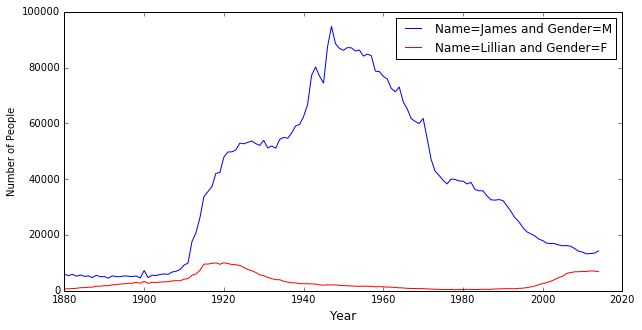

In [18]:
#Find and plot the trend of the names "Lillian" and "James". To get both results, use the UNION function between the two SQL SELECT statements. This will return both queries in one SQL result. 
cur.execute("SELECT name, year, count FROM NationalNames WHERE name='Lillian' AND gender='F'"+ 
            " UNION " +
            " SELECT name, year, count FROM NationalNames WHERE name='James' AND gender='M';")
landj=cur.fetchall() #returns the year and count for the names James and Lillian

#print(landj[0])
xj=[]
yj=[]
xl=[]
yl=[]
for i in range(len(landj)): #this will separate out the two names from the SQL returned data
    if landj[i][0]=='James':
            xj.append(landj[i][1]) #James
            yj.append(landj[i][2])
    else:
            xl.append(landj[i][1]) #Lillian
            yl.append(landj[i][2])
fig=plt.figure(figsize=(10,5))
plt.plot(xj,yj, color="blue", label="Name=James and Gender=M")
plt.plot(xl, yl, color="red", label="Name=Lillian and Gender=F")
plt.legend(loc='upper right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of People')
plt.show()

#for i in range(len(landj)):
#    for j in range(len(landj[i])):
#                print(landj[i][j])

In [88]:
#bryan playing around/us talking about this
bryansnames=['James','Lillian']
for mname in bryansnames:
    print ("Now you put in your sql commands for " + mname)
    x_n=[]
    y_n=[]
    for i in range(len(yoursql_output)):
        
    plt.plot()
plt.show()

Now you put in your sql commands for James
Now you put in your sql commands for Lillian


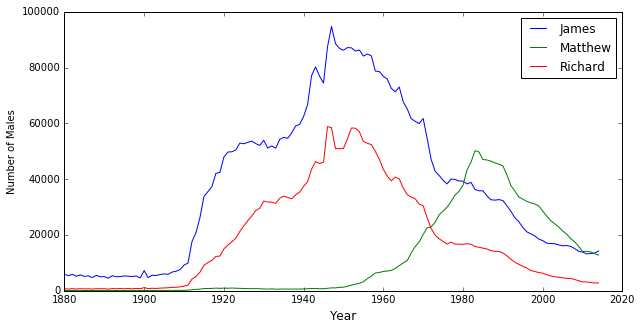

In [136]:
#Find and plot the trend of 3 different names, feed to the SQL SELECT statement from a name table.
bryansnames=['James', 'Matthew', 'Richard']
fig=plt.figure(figsize=(10,5))
for name in bryansnames:
    cur.execute("SELECT name, year, count FROM NationalNames WHERE name='" + name + "' AND gender='M';")
    output=cur.fetchall()
#    print(name)
    x=[]
    y=[]
    for i in range(len(output)):
        x.append(output[i][1])
        y.append(output[i][2])
    plt.plot(x,y,label=output[0][0])

#fig=plt.figure(figsize=(10,5))
plt.legend(loc='upper right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Males')
plt.show()
    


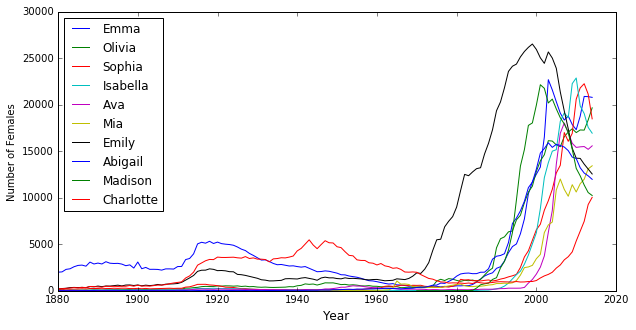

In [152]:
#Find and plot the trend of 3 different names, feed to the SQL SELECT statement from a name table.
cur.execute("SELECT name FROM NationalNames WHERE year='2014' AND gender='F' LIMIT 10")
topten=cur.fetchall()
toptenlist = [x[0] for x in topten]
fig=plt.figure(figsize=(10,5))
for name in toptenlist:
    cur.execute("SELECT name, year, count FROM NationalNames WHERE name='" + name + "' AND gender='F';")
    output=cur.fetchall()
#    print(name)
    x=[]
    y=[]
    for i in range(len(output)):
        x.append(output[i][1])
        y.append(output[i][2])
    plt.plot(x,y,label=output[0][0])

#fig=plt.figure(figsize=(15,10))
plt.legend(loc='upper left',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Females')
plt.show()

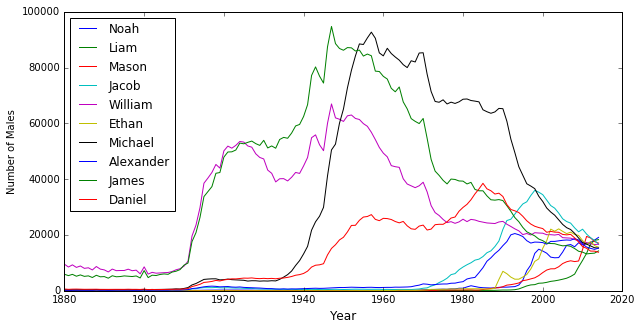

In [153]:
#Similar as the last input but with male names.
cur.execute("SELECT name FROM NationalNames WHERE year='2014' AND gender='M' LIMIT 10")
topten=cur.fetchall()
toptenlist = [x[0] for x in topten]
fig=plt.figure(figsize=(10,5))
for name in toptenlist:
    cur.execute("SELECT name, year, count FROM NationalNames WHERE name='" + name + "' AND gender='M';")
    output=cur.fetchall()
#    print(name)
    x=[]
    y=[]
    for i in range(len(output)):
        x.append(output[i][1])
        y.append(output[i][2])
    plt.plot(x,y,label=output[0][0])

#fig=plt.figure(figsize=(15,10))
plt.legend(loc='upper left',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Males')
plt.show()

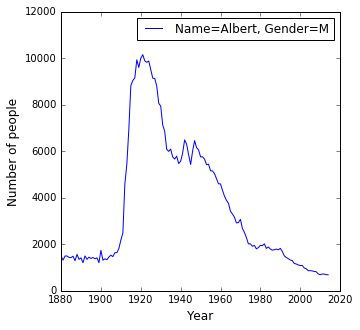

In [16]:
cur.execute("SELECT year, count FROM NationalNames WHERE name='Albert' AND gender='M';")
data=cur.fetchall()
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
fig=plt.figure(figsize=(5,5))
plt.plot(x_val,y_val, label="Name=Albert, Gender=M") 
plt.legend(fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of people', fontsize=12)
plt.show()

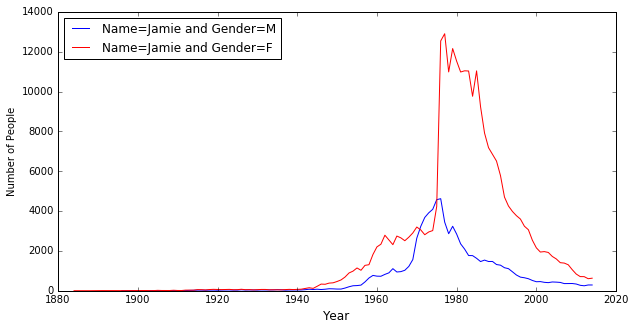

In [25]:
cur.execute("SELECT name, year, count, gender FROM NationalNames WHERE name='Jamie';")
jamie=cur.fetchall() #returns the year and count for the name Jamie, male and female

#print(landj[0])
xf=[]
yf=[]
xm=[]
ym=[]
for i in range(len(jamie)): #this will separate out the two genders from the SQL returned data
    if jamie[i][3]=='M':
            xm.append(jamie[i][1]) #male
            ym.append(jamie[i][2])
    else:
            xf.append(jamie[i][1]) #female
            yf.append(jamie[i][2])
fig=plt.figure(figsize=(10,5))
plt.plot(xm,ym, color="blue", label="Name=Jamie and Gender=M")
plt.plot(xf, yf, color="red", label="Name=Jamie and Gender=F")
plt.legend(loc='upper left',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of People')
plt.show()